# Week 3: Improve MNIST with Convolutions

In the videos you looked at how you would improve Fashion MNIST using Convolutions. For this exercise see if you can improve MNIST to 99.5% accuracy or more by adding only a single convolutional layer and a single MaxPooling 2D layer to the model from the  assignment of the previous week. 

You should stop training once the accuracy goes above this amount. It should happen in less than 10 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your callback.

When 99.5% accuracy has been hit, you should print out the string "Reached 99.5% accuracy so cancelling training!"


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Loading the digits mnist dataset from keras from the file mnist.npz
(training_images, training_labels), (testing_images, testing_labels) = keras.datasets.mnist.load_data(path="mnist.npz")


## Pre-processing the data

One important step when dealing with image data is to preprocess the data. During the preprocess step you can apply transformations to the dataset that will be fed into your convolutional neural network.

Here you will apply two transformations to the data:
- Reshape the data so that it has an extra dimension. The reason for this 
is that commonly you will use 3-dimensional arrays (without counting the batch dimension) to represent image data. The third dimension represents the color using RGB values. This data might be in black and white format so the third dimension doesn't really add any additional information for the classification process but it is a good practice regardless.


- Normalize the pixel values so that these are values between 0 and 1. You can achieve this by dividing every value in the array by the maximum.

Remember that these tensors are of type `numpy.ndarray` so you can use functions like [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) or [divide](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) to complete the `reshape_and_normalize` function below:

In [20]:
def reshape_and_normalize(images, count):
    # Reshape the images to add an extra dimension
    images = np.reshape(images, (count, 28, 28, 1))
    
    # Normalize pixel values
    images = images / 255.0
    
    return images

Test your function with the next cell:

In [22]:
# Reload the images in case you run this cell multiple times
(training_images, _), (testing_images, _) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Apply your function
training_images = reshape_and_normalize(training_images, 60000)
testing_images = reshape_and_normalize(testing_images, 10000)

print(f"Maximum pixel value of training image after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one training image after reshaping: {training_images[0].shape}")

print(f"Maximum pixel value of testing image after normalization: {np.max(testing_images)}\n")
print(f"Shape of testing set after reshaping: {testing_images.shape}\n")
print(f"Shape of one testing image after reshaping: {testing_images[0].shape}")


Maximum pixel value of training image after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one training image after reshaping: (28, 28, 1)
Maximum pixel value of testing image after normalization: 1.0

Shape of testing set after reshaping: (10000, 28, 28, 1)

Shape of one testing image after reshaping: (28, 28, 1)


Defining the callback for accuracy >- 99.5%

In [23]:
class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.995:
            print("\n\nTraining stopped because accuracy reached 99.5%\n")
            self.model.stop_training = True

## Convolutional Model

**Defining the model to achieve an accuracy of 99.5% or more before 10 epochs to pass this assignment.**

In [24]:
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    return model

In [25]:
# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1533 - accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9953

Training stopped because accuracy reached 99.5%

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0153 - accuracy: 0.9953


If you see the message that you defined in your callback printed out after less than 10 epochs it means your callback worked as expected. You can also double check by running the following cell:

In [26]:
# grader-required-cell

print(f"Your model was trained for {len(history.epoch)} epochs")

Your model was trained for 5 epochs


Evaluating the model on test data

In [27]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.9859


[0.04292593151330948, 0.9858999848365784]

Creating classifications for all test data

313/313 [==============================] - 1s 4ms/step
7
[2.7363094e-09 5.8036747e-08 3.2296127e-06 2.3293962e-05 5.0153143e-10
 1.5953988e-10 5.6598914e-14 9.9997330e-01 2.6673984e-08 4.5652374e-08]


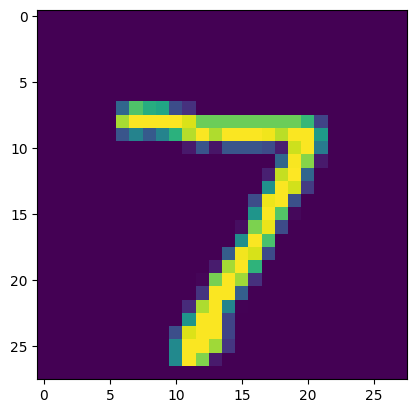

In [28]:
classifications = model.predict(testing_images)

index = 0
plt.imshow(testing_images[index])
print(testing_labels[index])
print(classifications[index])